In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score 

# 데이터 가져오기 
from sklearn.datasets import load_iris

# 결과값을 일치시키기 위해 랜덥값을 고정
np.random.seed(5) 

In [3]:
# 추론 통계의 프로세스 
# 추론 통계란 전통 톻계학에서 진행하는 분석법(R!)
# 문제 정의 > 가설 설정(귀무/연구 > 유의수준 결정) > 분석도구 결정 > 데이터 수집 > EDA(가능하면?) 
# > 분석 모델 선정 > 전처리 > 분석 > 평가(가설에 대한 검증) 

# 예측 분석의 프로세스
# 문제 정의 > 데이터 수집 > EDA > 전처리 > 분석 모델 선정 > 학습 > 평가 

## iris 데이터 시각화

In [5]:
# iris 데이터 시각화
dataset = load_iris()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names) #실제 데이터는 .data에 있다.
df.head()

# lable(target)이 없다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# 분류값을 데이터 프레임에 저장
df['target'] = dataset.target # target에 데이터가 있다. 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# 빈도수 확인
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [17]:
# 숫자인 분류값의 이해를 위해 문자로 변경
df.target = df.target.map({0:'setosa', 1 : 'vesicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### iris데이터의 분포도 확인
- iris 데이터의 분포도를 확인해보고, 결과를 통해서 iris의 데이터가 정규분포(Gaussian Distribution)를 이루고 있는지를 확인.

In [18]:
# 분류값 별로 데이터 프레임을 나눈다.
setosa_df = df[df.target == 'setosa']
vesicolor_df = df[df.target == 'vesicolor']
virginica_df = df[df.target == 'virginica']

<AxesSubplot:>

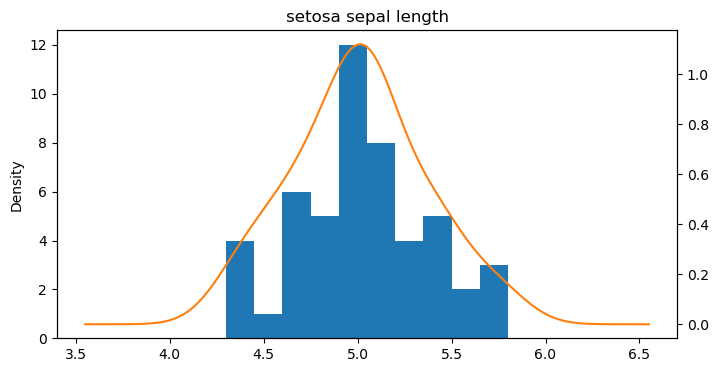

In [23]:
# setosa sepal length(cm)에 대한 시각화
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',ax=ax, secondary_y=True, title='setosa sepal length',figsize=(8,4) ) # kde = 표준밀도 

<AxesSubplot:>

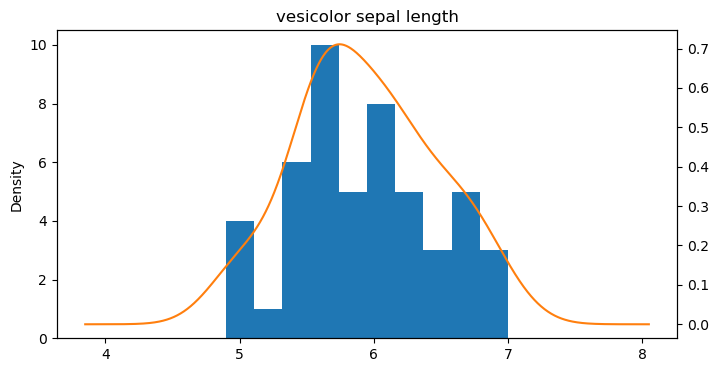

In [25]:
# vesicolor sepal length(cm)에 대한 시각화
ax = vesicolor_df['sepal length (cm)'].plot(kind='hist')
vesicolor_df['sepal length (cm)'].plot(kind='kde',ax=ax, secondary_y=True, title='vesicolor sepal length',figsize=(8,4))

<AxesSubplot:>

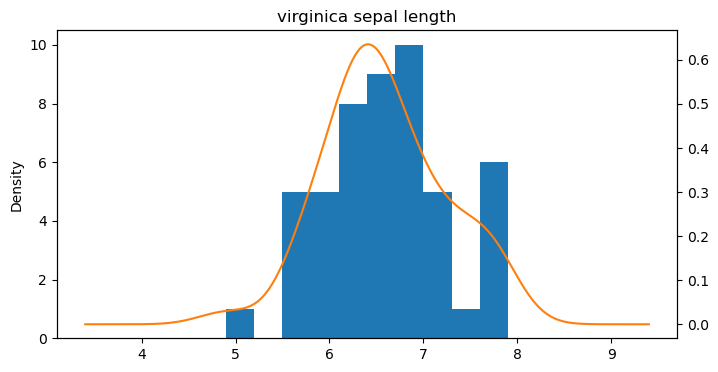

In [27]:
# virginica sepal length(cm)에 대한 시각화
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',ax=ax, secondary_y=True, title='virginica sepal length',figsize=(8,4))

<AxesSubplot:>

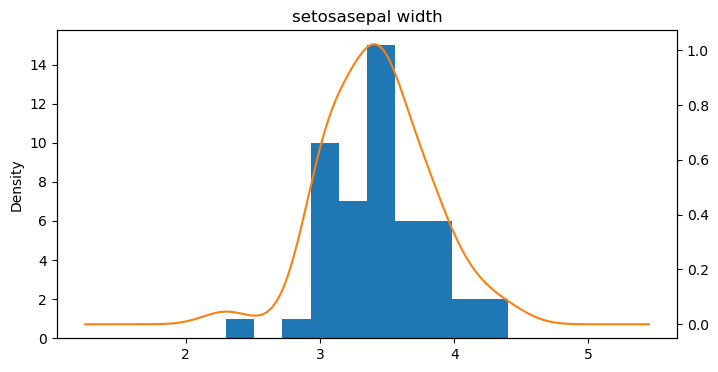

In [29]:
# setosa sepal width (cm)에 대한 시각화
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde',ax=ax, secondary_y=True, title='setosasepal width',figsize=(8,4) ) 

<AxesSubplot:>

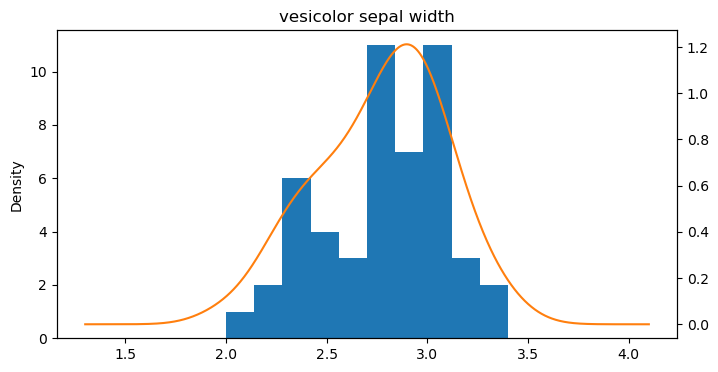

In [31]:
# vesicolor sepal width (cm)에 대한 시각화
ax = vesicolor_df['sepal width (cm)'].plot(kind='hist')
vesicolor_df['sepal width (cm)'].plot(kind='kde',ax=ax, secondary_y=True, title='vesicolor sepal width',figsize=(8,4) ) 

.... 나머지도 해보며 정규분포를 그리는지 확인

### 데이터를 학습과 테스트로 나누기

In [32]:
# 20%를 데스트 데이터로 분류
X_train,X_test, y_train, y_test  = train_test_split(dataset.data, dataset.target, test_size=0.2)

### Gaussian Naive Bayes로 분류하기

In [33]:
# 학습데이터로 모델을 학습
model = GaussianNB()
model.fit(X_train, y_train) 

GaussianNB()

In [34]:
# 테스트 데이터로 모델을 테스트 
pred = model.predict(X_test)

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

